# code2.1

In [1]:
import wave as wave
import pyroomacoustics as pa
import numpy as np

In [2]:
pa.datasets.CMUArcticCorpus(
    basedir="./CMU_ARCTIC",
    download=True,
    speaker=["aew", "axb"]
)

In [3]:
sample_wave_file = "./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"
wav = wave.open(sample_wave_file)

In [4]:
print("サンプリング周波数[Hz]: ", wav.getframerate())
print("サンプルサイズ[Byte]: ", wav.getsampwidth())
print("サンプル数; ", wav.getnframes())
print("チャンネル数: ", wav.getnchannels())

サンプリング周波数[Hz]:  16000
サンプルサイズ[Byte]:  2
サンプル数;  62081
チャンネル数:  1


In [5]:
# PCM形式の波形データを読み込み
data = wav.readframes(wav.getnframes())

data = np.frombuffer(data, dtype=np.int16)
wav.close()

# code 2.2

In [6]:
import matplotlib.pyplot as plt

In [7]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [8]:
# データの正規化
data = data / np.iinfo(np.int16).max

In [9]:
# xの値 秒単位
x = np.array(
    range(wav.getnframes())
) / wav.getframerate()
x

array([0.0000000e+00, 6.2500000e-05, 1.2500000e-04, ..., 3.8798750e+00,
       3.8799375e+00, 3.8800000e+00])

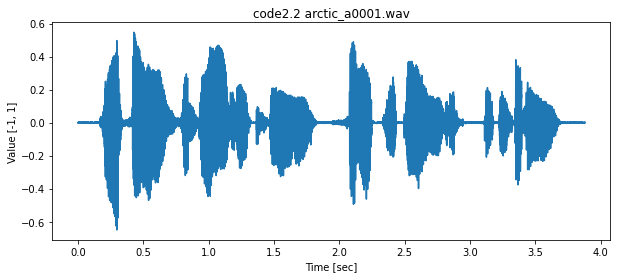

In [10]:
plt.figure(figsize=(10, 4))
plt.title("code2.2 arctic_a0001.wav")
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1, 1]")
plt.plot(x, data)
plt.savefig("./wave_form.png")
plt.show()

# code2.3
ホワイトノイズをグラフ化

In [11]:
n_sample = 40000
sample_rate = 16000
np.random.seed(0)

data = np.random.normal(size=n_sample)

x = np.array(
    range(n_sample)
) / sample_rate

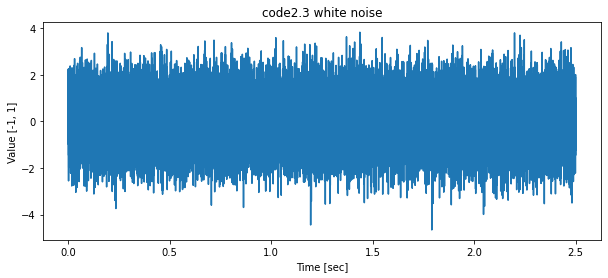

In [12]:
plt.figure(figsize=(10, 4))
plt.title("code2.3 white noise")
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1, 1]")
plt.plot(x, data)
plt.show()

# code2.4
ファイルに音声データを書き込む

In [13]:
np.random.seed(0)
data = np.random.normal(scale=0.1, size=n_sample)
data_scale_adjust = data * np.iinfo(np.int16).max

print(data.max(), np.iinfo(np.int16).max, data_scale_adjust.max())

0.38317901624010536 32767 12555.626825139532


In [14]:
wave_out = wave.open("./wgn_wave.wav", "w")
# モノラル: 1, ステレオ: 2
wave_out.setnchannels(1)
# サンプルサイズ byte
wave_out.setsampwidth(2)
# サンプリング周波数
wave_out.setframerate(sample_rate)

wave_out.writeframes(data_scale_adjust)
# wave_out.close()

# code2.5
音声ファイルを再生する

In [20]:
import sounddevice as sd
sd.play(data_scale_adjust, 16000)
print("再生開始")
status = sd.wait()

再生開始


In [21]:
from playsound import playsound
playsound("wgn_wave.wav")